In [1]:
import os
import sys
print(os.getcwd())
sys.path.append("../WanPy")

import numpy as np
from pythtb import *
from pythTB_wan import Bloch, K_mesh, Wannier
import models

/Users/treycole/Codes/WanPy/top_obstruction


In [6]:
# tight-binding parameters
delta = 1

# # checkerboard
# t0 = 0.4
# tprime = 0.5

# Haldane
t = 1
t2 = -0.4

n_super_cell = 1
model = models.Haldane(delta, t, t2).make_supercell([[n_super_cell, 0], [0, n_super_cell]])

n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)

In [5]:
nkx, nky = 20, 20
k_mesh = K_mesh(model, nkx, nky)
full_mesh = k_mesh.gen_k_mesh(endpoint=False)

QGT = model.quantum_geom_tens(full_mesh)
Omega = -2 * QGT.imag 
g = QGT.real

Chern = model.Chern_num(Omega)

In [7]:
Omega.shape

(400, 2, 2, 2)

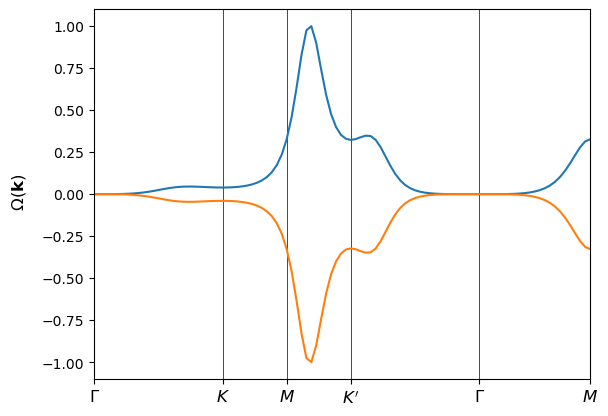

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

k_path = [[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0], [.5, .5]]
k_label = (r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $', r'$M$')
(k_vec, k_dist, k_node) = model.k_path(k_path, 101, report=False)

ax.set_xlim(0, k_node[-1])
ax.set_xticks(k_node)
for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color='k')
if k_label is not None:
    ax.set_xticklabels(k_label, size=12)

QGT = model.quantum_geom_tens(k_vec)
Omega_path = -2 * QGT.imag
g_path = QGT.real

ax.set_ylabel(r" $\Omega(\mathbf{{k}})$", size=12)
ax.yaxis.labelpad = 10

for n in range(n_orb):
    plt.plot(k_dist, Omega_path[:, n, 0, 1] )

In [ ]:
# Reshape Omega for plotting
band_idx = 0
Omega_band = Omega[:, band_idx].reshape(nkx, nky)

# Generate k-grid for plotting
kx_vals = np.linspace(-np.pi, np.pi, nkx)
ky_vals = np.linspace(-np.pi, np.pi, nky)
KX, KY = np.meshgrid(kx_vals, ky_vals)

# Plot Berry curvature for band 0
plt.figure(figsize=(6, 5))
plt.contourf(KX, KY, Omega_band.T, levels=100, cmap='plasma')
plt.colorbar(label=r'Berry Curvature $\Omega(\mathbf{k})$')
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.title(f'Berry Curvature for Band {band_idx}')
plt.show()